In [ ]:
!pip install google-cloud-speech
!pip install requests
!pip install transformers torch
!pip install psutil
!pip install jiwer
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.1/334.1 kB 7.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import wave

# Dosyayı açma
filename = "english_audio_16000hz.wav"
with wave.open(filename, 'rb') as wf:
    print(wf.getparams())  # Parametreler hakkında bilgi edinme (ör. kanal sayısı, örnekleme hızı)


_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=277248, comptype='NONE', compname='not compressed')


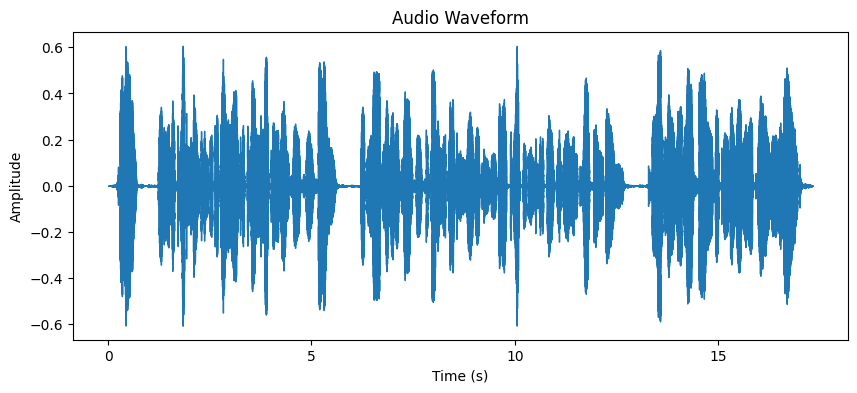

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Ses dosyasını yükle (16 kHz örnekleme frekansı ile)
filename = "english_audio_16000hz.wav"
y, sr = librosa.load(filename, sr=16000)  # sr=16000, 16 kHz örnekleme hızı

# Dalga formunu görselleştirme
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


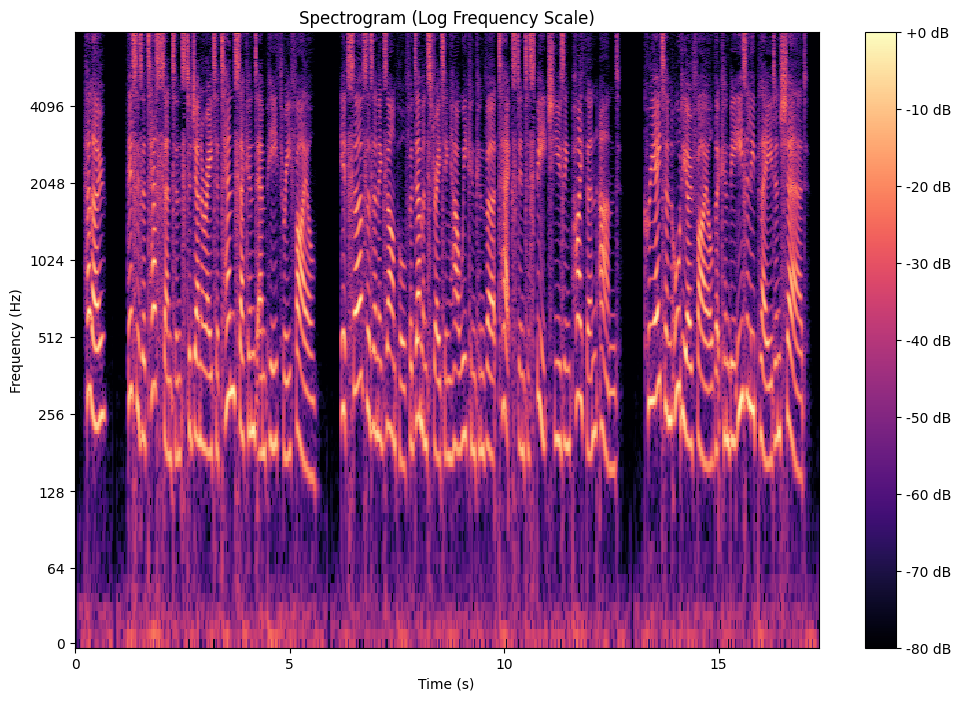

In [ ]:
import numpy as np

# FFT ile frekans spektrumunu hesapla
n_fft = 2048  # FFT için pencere boyutu
hop_length = 512  # Her bir FFT bloğu arasında kaydırma

D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)  # STFT (Kısa Zamanlı Fourier Transform)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Decibel cinsine çevir

# Spektrumu görselleştirme
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log Frequency Scale)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()
